# Import Library dan Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = pd.read_csv("TLKM.JK.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


# Eksplorasi Data

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.isnull().sum()/len(data)

Date         0.000000
Open         0.000703
High         0.000703
Low          0.000703
Close        0.000703
Adj Close    0.000703
Volume       0.000703
dtype: float64

In [ ]:
data = data.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')

In [ ]:
print(data.dtypes)

Date     object
High    float64
dtype: object


In [ ]:
data

,Date,High
0,2017-01-02,3980.0
1,2017-01-03,3990.0
2,2017-01-04,3980.0
3,2017-01-05,4030.0
4,2017-01-06,4010.0
...,...,...
1417,2022-08-26,4540.0
1418,2022-08-29,4550.0
1419,2022-08-30,4620.0
1420,2022-08-31,4600.0


In [ ]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1422, freq=None)

In [ ]:
data

,High
Date,
2017-01-02,3980.0
2017-01-03,3990.0
2017-01-04,3980.0
2017-01-05,4030.0
2017-01-06,4010.0
...,...
2022-08-26,4540.0
2022-08-29,4550.0
2022-08-30,4620.0


In [ ]:
#Menginisialkan variabel High sebagai data time series
ts = data['High']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3990.0
2017-01-04    3980.0
2017-01-05    4030.0
2017-01-06    4010.0
2017-01-09    4030.0
2017-01-10    4030.0
2017-01-11    4000.0
2017-01-12    3970.0
2017-01-13    3970.0
Name: High, dtype: float64

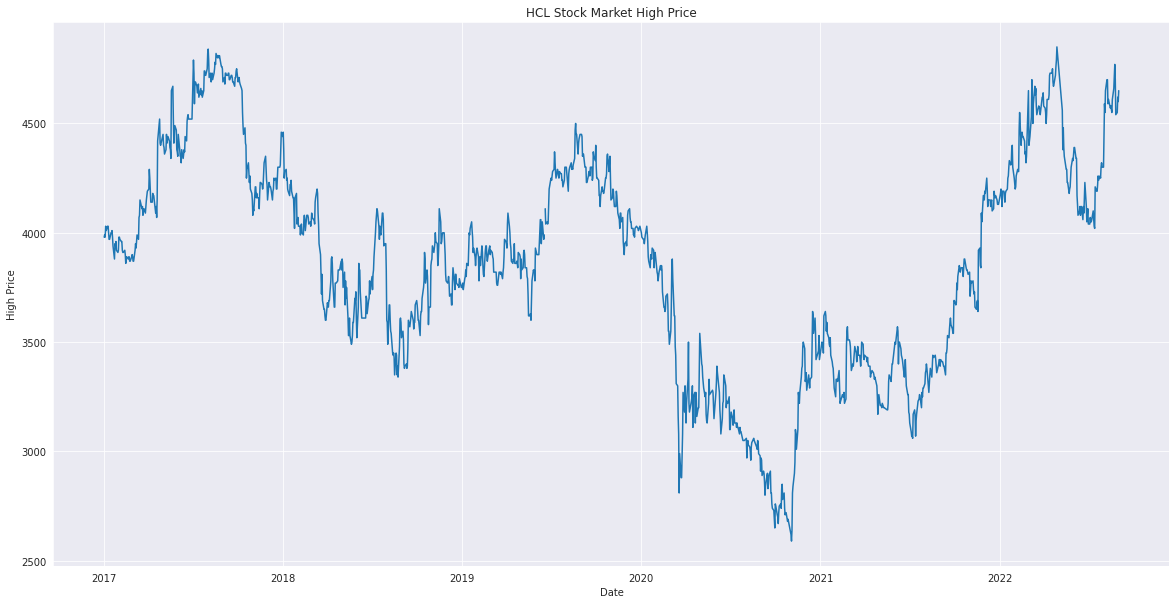

In [ ]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('HCL Stock Market High Price')
plt.plot(data['High'])

## Uji Stasioneritas Data

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=22).mean()
    rolstd = timeseries.rolling(window=22).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Uji Hipotesis:

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

In [ ]:
ts = data - ts.shift()
ts = data.dropna()

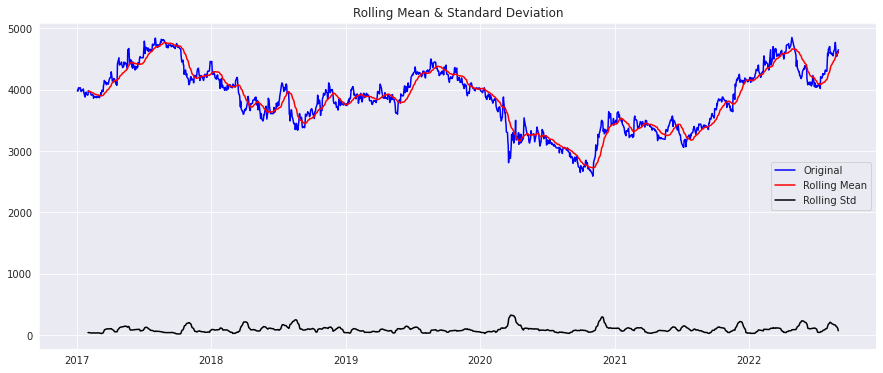

Results of Dickey-Fuller Test:
Test Statistic                   -1.775556
p-value                           0.392663
#Lags Used                        2.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

Diperoleh nilai p-value < 0,05, maka H0 ditolak.

Jadi, data memiliki keadaan yang stasioner.

Karena data sudah stasioner, sehingga kita tidak perlu melakukan proses stasionerisasi data, yakni dengan proses differencing untuk memperoleh data yang stasioner.

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=497.556
ARIMA(0, 0, 1) RMSE=269.975
ARIMA(0, 0, 2) RMSE=173.330
ARIMA(0, 0, 3) RMSE=163.300
ARIMA(0, 1, 0) RMSE=61.292
ARIMA(0, 1, 1) RMSE=61.394
ARIMA(0, 1, 2) RMSE=60.658
ARIMA(0, 1, 3) RMSE=60.770
ARIMA(1, 0, 0) RMSE=61.299
ARIMA(1, 0, 1) RMSE=61.405
ARIMA(1, 0, 2) RMSE=60.694
ARIMA(1, 0, 3) RMSE=60.805
ARIMA(1, 1, 0) RMSE=61.373
ARIMA(1, 1, 1) RMSE=61.600
ARIMA(1, 1, 2) RMSE=60.781
ARIMA(1, 1, 3) RMSE=60.681
ARIMA(2, 0, 0) RMSE=61.383
ARIMA(2, 0, 1) RMSE=61.277
ARIMA(2, 0, 2) RMSE=60.803
ARIMA(2, 0, 3) RMSE=60.747
ARIMA(2, 1, 0) RMSE=60.609
ARIMA(2, 1, 1) RMSE=60.742
ARIMA(2, 1, 2) RMSE=60.779
ARIMA(2, 1, 3) RMSE=60.733
ARIMA(3, 0, 0) RMSE=60.656
ARIMA(3, 0, 1) RMSE=60.761
ARIMA(3, 0, 2) RMSE=60.771
ARIMA(3, 0, 3) RMSE=60.760
ARIMA(3, 1, 0) RMSE=60.712
ARIMA(3, 1, 1) RMSE=60.754
ARIMA(3, 1, 2) RMSE=60.782
ARIMA(3, 1, 3) RMSE=60.968
Best ARIMA(2, 1, 0) RMSE=60.609


Setelah dilakukan percobaan dengan model ARIMA(p,d,q) dengan:

- orde p = 0 dan 1
- orde d = 0 dan 1
- orde q = 0 dan 1

Diperoleh model yang menghasilkan RMSE terkecil adalah model ARIMA (2,1,0).

Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-1 

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


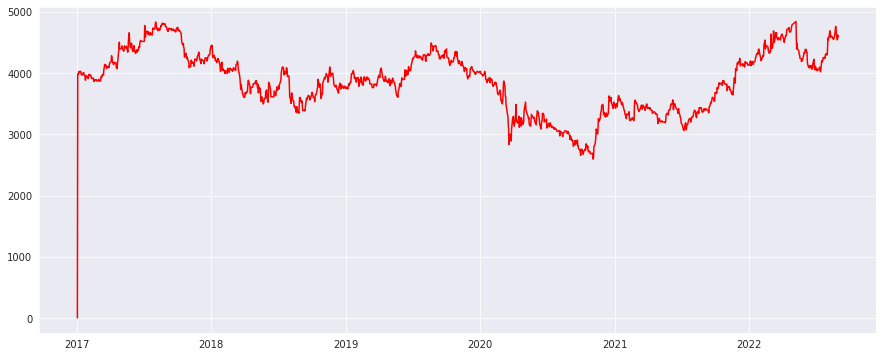

In [ ]:
#Visualisasi perbandingan antara dataset setelah differencingdengan data hasil prediksi ARIMA(1,1,1)
model_ARIMA = ARIMA(ts, order=(1,1,1))
results_ARIMA = model_ARIMA.fit()
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)             
plt.plot(predictions_ARIMA, color='red')  

In [ ]:
#Informasi yang diperoleh dari pemodelan ARIMA(1,1,1) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1421
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7827.961
Date:                Sun, 19 Mar 2023   AIC                          15661.921
Time:                        14:58:04   BIC                          15677.696
Sample:                             0   HQIC                         15667.814
                               - 1421                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7856      0.110      7.113      0.000       0.569       1.002
ma.L1         -0.8276      0.101     -8.159      0.000      -1.026      -0.629
sigma2      3595.3846     80.992     44.392      0.000    3436.642    3754.127
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               779.75
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.37
Prob(H) (two-sided):                  0.36   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediksi Data

In [ ]:
import pandas as pd
import statsmodels.api as sm

#buat model ARIMA
model_ARIMA = sm.tsa.ARIMA(ts, order=(1,1,1))
results_ARIMA = model_ARIMA.fit()

#Prediksi data dengan model ARIMA(2,1,0) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=1327,end=1330, dynamic=False)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [-1]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)


Date
2022-04-08     4540.196246
2022-04-11    13689.440265
2022-04-12    27447.068599
2022-04-13    45832.519131
dtype: float64


Diperoleh hasil prediksi untuk nilai harga tertinggi saham TELKOM pada periode tanggal :
- 08 April 2022 = 4540.196246
- 11 April 2022 = 13689.440265
- 12 April 2022 = 27447.068599
- 13 April 2022 = 45832.519131